### OHLCV 

This is what every price chart is made of:
Open: Price at market open
High: Highest price that day
Low: Lowest price
Close: Price at market close
Volume: How many shares/contracts traded

In [30]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 16.6 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 13.0 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.8/7.0 MB 9.3 MB/s eta 0:00:01
   --------------------- ------------------ 3.7/7.0 MB 9.4 MB/s eta 0:00:01
   ------------------------------ --------- 5.2/7.0 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  6.8/7.0 MB 8.3 MB/s eta 0:00:01
   ------------------------

What is Adjusted Close?
Adjusted Close is the stock's closing price after accounting for corporate actions like:

Dividends 💸

Stock splits 🧩

Bonus shares or mergers

It reflects the true economic value of holding the stock over time.

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = yf.download("AAPL", start="2020-01-01", end="2025-01-01", auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [40]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [41]:
# Flatten the MultiIndex columns
df.columns = df.columns.get_level_values(0)

In [42]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,72.620850,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.914825,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.487854,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.146935,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.307503,75.797501,76.110001,74.290001,74.290001,132079200


## 🧮 Simple Return  
**Formula:**

\[
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
\]

✅ Easy to interpret (percentage)  
❌ Not additive over time  
❌ Not symmetric (e.g. +100% and -50% don’t cancel out)  
📊 Better for **presentation**, not for modeling

---

## 📘 Log Return (a.k.a. Continuous Return)  
**Formula:**

\[
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
\]

✅ Additive across time  
✅ Symmetric (log(+x%) and log(−x%) offset cleanly)  
✅ More likely to be normally distributed (model-friendly)  
📈 Used heavily in **quantitative finance**, **ML models**, and **time series**

---

## 🧠 Real-Life Example (1 → 2 → 1)

| Step     | Price | Simple Return | Log Return |
|----------|-------|----------------|-------------|
| Start    | ₹1    | –              | –           |
| +100%    | ₹2    | +100%          | +0.6931     |
| −50%     | ₹1    | −50%           | −0.6931     |
| **Net**  | ₹1    | 0% ❌          | 0.0 ✅       |

🧨 **Simple return misleads** — doesn’t cancel cleanly  
🧠 **Log return tracks reality** — cancels perfectly

---

## ✅ TL;DR: When to Use What?

| Feature                   | Simple Return | Log Return |
|--------------------------|----------------|------------|
| Easy to interpret        | ✅ Yes         | ❌ No       |
| Additive across time     | ❌ No          | ✅ Yes      |
| Symmetric behavior       | ❌ No          | ✅ Yes      |
| Normally distributed     | ❌ Often skewed| ✅ Usually  |
| Used in quant modeling   | ❌ Rarely      | ✅ Heavily  |


In [49]:
df["Simple Return"] = df["Adj Close"].pct_change()
df["Log Return"] = (df["Adj Close"]/df["Adj Close"].shift(1)).apply(np.log)

<Axes: title={'center': 'AAPL Returns'}, xlabel='Date'>

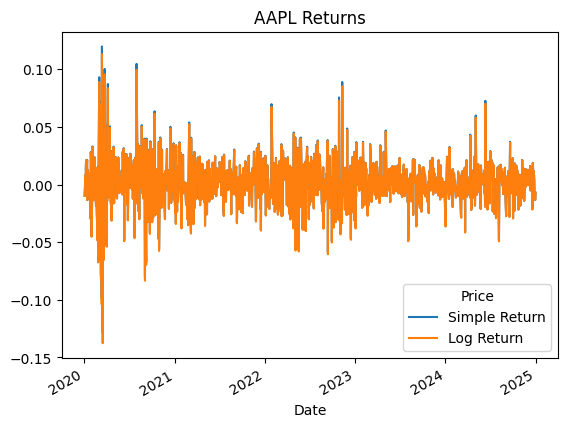

In [50]:
df[["Simple Return", "Log Return"]].plot(title="AAPL Returns")

Moving Averages (SMA & EMA)
📘 Why it matters:
Smooths out price noise

Quant strategy foundation: MA crossovers

<Axes: title={'center': 'AAPL w/ Moving Averages'}, xlabel='Date'>

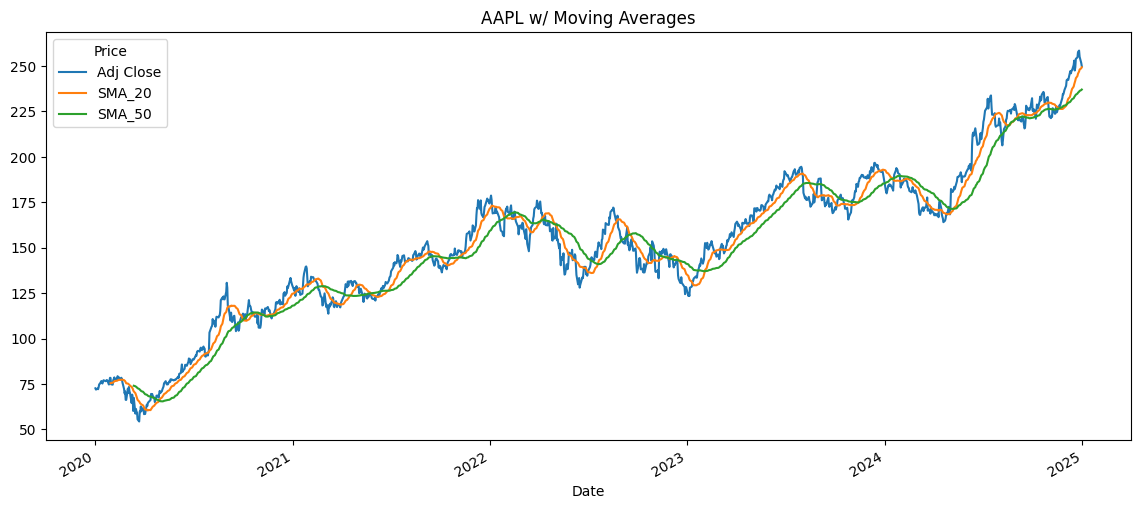

In [51]:
df["SMA_20"] = df["Adj Close"].rolling(20).mean()
df["SMA_50"] = df["Adj Close"].rolling(50).mean()
df[["Adj Close", "SMA_20", "SMA_50"]].plot(figsize=(14,6), title="AAPL w/ Moving Averages")

 Volatility
📘 What it is:
Standard deviation of returns

Rolling window helps show dynamic risk

<Axes: title={'center': 'AAPL 20-Day Rolling Volatility'}, xlabel='Date'>

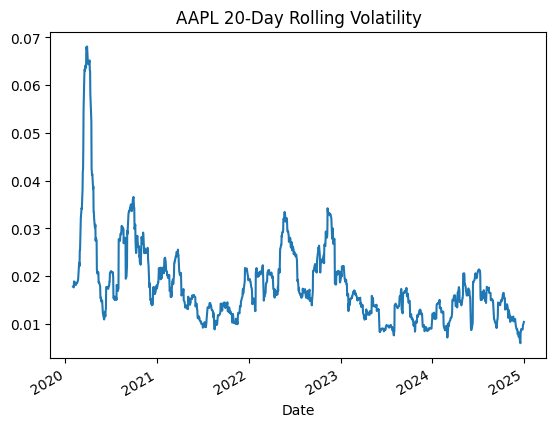

In [52]:
df["Volatility_20"] = df["Log Return"].rolling(window=20).std()
df["Volatility_20"].plot(title="AAPL 20-Day Rolling Volatility")

<Axes: title={'center': 'Cumulative Return of AAPL'}, xlabel='Date'>

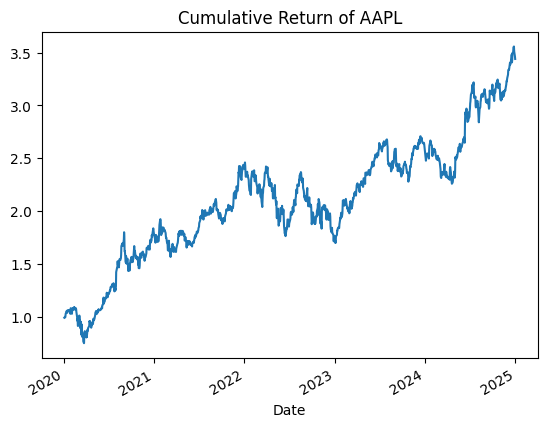

In [53]:
df["Cumulative Return"] = (1 + df["Simple Return"]).cumprod()
df["Cumulative Return"].plot(title="Cumulative Return of AAPL")

---

````markdown
# 📈 Moving Average Crossover Strategy Breakdown

This is a step-by-step explanation of a simple **moving average crossover trading strategy** using Python and Pandas.

---

## ✅ 1. Generate Buy Signal

```python
df["Signal"] = 0
df["Signal"][df["SMA_20"] > df["SMA_50"]] = 1
````

### 🔍 What’s happening:

* You're checking if the 20-day SMA is greater than the 50-day SMA.
* If **SMA\_20 > SMA\_50**, it signals a bullish trend → `Signal = 1`
* Otherwise, keep `Signal = 0`
* This is known as a **bullish crossover** (short-term momentum > long-term trend)

---

## ✅ 2. Shift Signal to Avoid Lookahead Bias

```python
df["Position"] = df["Signal"].shift(1)
```

### 🔍 Explanation:

* You **shift the signal forward by 1 day** to avoid executing trades on the same day the signal is generated.
* This prevents **lookahead bias**.
* `Position = 1` means you're **in the trade** (holding the asset).
* `Position = 0` means you're **out of the market**.

---

## ✅ 3. Calculate Strategy Returns

```python
df["Strategy Return"] = df["Position"] * df["Simple Return"]
```

### 🔍 Explanation:

* You only earn return when you’re holding the position.
* This line multiplies the market return by your position (1 or 0).
* If you’re not in the trade, your return is 0 that day.

---

## ✅ 4. Compute Cumulative Strategy Return

```python
df["Cumulative Strategy Return"] = (1 + df["Strategy Return"]).cumprod()
```

### 🔍 Explanation:

* This compounds your daily strategy returns over time.
* Formula:

  $$
  (1 + r_1)(1 + r_2)(1 + r_3)\dots
  $$
* Shows the **total growth** of your strategy portfolio.

---

## ✅ 5. Compare with Buy & Hold

```python
df[["Cumulative Return", "Cumulative Strategy Return"]].plot(title="Buy & Hold vs Strategy")
```

### 🔍 Explanation:

* `Cumulative Return`: Return if you simply bought and held the asset.
* `Cumulative Strategy Return`: Return from your crossover strategy.
* This plot helps visualize **performance differences**.

---

## 🧠 Strategy Summary

| Component            | Purpose                                   |
| -------------------- | ----------------------------------------- |
| SMA crossover signal | Identify bullish momentum                 |
| Signal shift         | Prevent lookahead bias (act the next day) |
| Strategy returns     | Realized return only when in position     |
| Cumulative return    | Tracks portfolio growth from strategy     |
| Plot comparison      | Visualize vs passive investing            |


C:\Users\prams\AppData\Local\Temp\ipykernel_6752\1718154988.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Signal"][df["SMA_20"] > df["SMA_50"]] = 1
C:\Users\prams\AppData\Local\Temp\ipykernel_6752\1718154988.py:2: SettingWithCopyWa

<Axes: title={'center': 'Buy & Hold vs Strategy'}, xlabel='Date'>

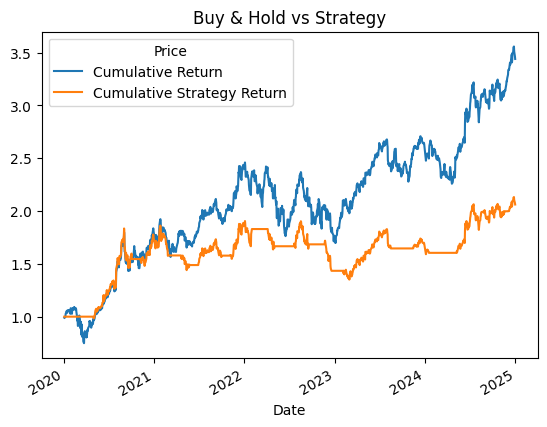

In [54]:
df["Signal"] = 0
df["Signal"][df["SMA_20"] > df["SMA_50"]] = 1
df["Position"] = df["Signal"].shift(1)

df["Strategy Return"] = df["Position"] * df["Simple Return"]
df["Cumulative Strategy Return"] = (1 + df["Strategy Return"]).cumprod()
df[["Cumulative Return", "Cumulative Strategy Return"]].plot(title="Buy & Hold vs Strategy")

# 📊 Sharpe Ratio & Max Drawdown — Explained

---

## 📘 Sharpe Ratio

The **Sharpe Ratio** measures **risk-adjusted return** — how much return you're earning per unit of volatility.

### 🧮 Formula:

\[
\text{Sharpe Ratio} = \frac{\text{Mean of Daily Return}}{\text{Standard Deviation of Daily Return}} \times \sqrt{252}
\]

> - 252 = trading days in a year (to annualize the Sharpe)
> - Higher Sharpe = better risk-adjusted return
> - Sharpe > 1 is considered good, > 2 is excellent

### 🧠 Intuition:
If two strategies both give you 10% returns but one is **more volatile**, its Sharpe ratio will be lower. We want returns with **less noise**.

---

## ✅ Python Code:

```python
sharpe_ratio = df["Strategy Return"].mean() / df["Strategy Return"].std()
annualized_sharpe = sharpe_ratio * np.sqrt(252)
print("Sharpe Ratio:", round(annualized_sharpe, 2))


In [55]:
# Sharpe Ratio
sharpe = df["Strategy Return"].mean() / df["Strategy Return"].std() * np.sqrt(252)
print("Sharpe Ratio:", sharpe)

# Max Drawdown
cum_returns = df["Cumulative Strategy Return"]
drawdown = cum_returns / cum_returns.cummax() - 1
max_drawdown = drawdown.min()
print("Max Drawdown:", max_drawdown)


Sharpe Ratio: 0.806029811932679
Max Drawdown: -0.29093513568275564
